In [2]:
!pip install numpy pandas matplotlib scikit-learn


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #graphing and visualizations
import os

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# 드라이브에 있는 dataset을 읽어옴
# 파일 경로 설정
# Load dataset
# read data - Music Info.csv
data1 = pd.read_csv("./dataset/Music Info.csv")

# read data - User Listening History.csv
data2 = pd.read_csv("./dataset/User Listening History.csv")

data1 = data1.head(5000)
data2 = data2.head(5000)

# 두 개의 데이터프레임을 'track_id'를 기준으로 병합
data = pd.merge(data1, data2, on='track_id', how='inner')

# 결과 확인
data.head()

Matplotlib is building the font cache; this may take a moment.


,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,user_id,playcount
0,TRSXCET128F92EB269,I Kissed a Girl,Katy Perry,https://p.scdn.co/mp3-preview/29414f20ba1659e9...,005lwxGU1tms6HGELIcUv9,"rock, pop, female_vocalists, dance, pop_rock",NaN,2008,179640,0.699,...,1,0.0677,0.00223,0.000000,0.1320,0.696,129.996,4,530fe4b17c4c6d1cb88dccdf8a8ded8a19fe1c5e,1
1,TRNNGMK128F423F034,Where Is My Mind?,Pixies,https://p.scdn.co/mp3-preview/d4a375a9c19d4ea8...,0DJU6KGwdkxEPCy3BZ3UZY,"rock, alternative, indie, alternative_rock, in...",Rock,2005,230093,0.514,...,1,0.0353,0.00780,0.000859,0.0802,0.212,82.104,4,2c42e6551311710ca5a839d62058820a42ead493,2
2,TRNNGMK128F423F034,Where Is My Mind?,Pixies,https://p.scdn.co/mp3-preview/d4a375a9c19d4ea8...,0DJU6KGwdkxEPCy3BZ3UZY,"rock, alternative, indie, alternative_rock, in...",Rock,2005,230093,0.514,...,1,0.0353,0.00780,0.000859,0.0802,0.212,82.104,4,7e2b716907a9a295d92c2f35d7e260aeee2b32cf,5
3,TRNNGMK128F423F034,Where Is My Mind?,Pixies,https://p.scdn.co/mp3-preview/d4a375a9c19d4ea8...,0DJU6KGwdkxEPCy3BZ3UZY,"rock, alternative, indie, alternative_rock, in...",Rock,2005,230093,0.514,...,1,0.0353,0.00780,0.000859,0.0802,0.212,82.104,4,2418d6837aada8911991cc748bc70a9a479f0cb4,5
4,TRNNGMK128F423F034,Where Is My Mind?,Pixies,https://p.scdn.co/mp3-preview/d4a375a9c19d4ea8...,0DJU6KGwdkxEPCy3BZ3UZY,"rock, alternative, indie, alternative_rock, in...",Rock,2005,230093,0.514,...,1,0.0353,0.00780,0.000859,0.0802,0.212,82.104,4,b96f2a9cbd9d86b4f9f15978dd3abbdfafe26502,1


In [2]:
# 데이터프레임의 컬럼 출력
data.columns

Index(['track_id', 'name', 'artist', 'spotify_preview_url', 'spotify_id',
       'tags', 'genre', 'year', 'duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'user_id',
       'playcount'],
      dtype='object')

In [2]:
new_data = pd.read_csv("./dataset (5).csv")
new_data

,0.5630081300813009,0.49048023889169345,0.36363636363636365,0.8067138485080338,0.04913978494623655,0.01688442211055276,0.0005393939393939394,0.12848249821410349,0.5192307692307693,0.38299680514086015,...,0.5,0.6,0.7,1,0.8,0.9,0.10,0.11,0.12,0.13
0,0.563008,0.490480,0.363636,0.806714,0.049140,0.016884,0.000539,0.128482,0.519231,0.382997,...,0,0,0,1,0,0,0,0,0,0
1,0.563008,0.490480,0.363636,0.806714,0.049140,0.016884,0.000539,0.128482,0.519231,0.382997,...,0,0,0,1,0,0,0,0,0,0
2,0.563008,0.490480,0.363636,0.806714,0.049140,0.016884,0.000539,0.128482,0.519231,0.382997,...,0,0,0,1,0,0,0,0,0,0
3,0.235772,0.800797,0.454545,0.834999,0.061613,0.052563,0.006121,0.110113,0.302632,0.371972,...,0,0,0,0,0,0,0,0,0,0
4,0.235772,0.800797,0.454545,0.834999,0.061613,0.052563,0.006121,0.110113,0.302632,0.371972,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15062,0.518293,0.297283,0.454545,0.704356,0.035914,0.982915,0.386869,0.102970,0.671053,0.708609,...,0,0,0,0,0,0,0,0,0,0
15063,0.518293,0.297283,0.454545,0.704356,0.035914,0.982915,0.386869,0.102970,0.671053,0.708609,...,0,0,0,0,0,0,0,0,0,0
15064,0.525407,0.546537,0.181818,0.782278,0.032581,0.112563,0.000000,0.330544,0.489879,0.493449,...,0,0,0,0,0,0,0,0,1,0
15065,0.525407,0.546537,0.181818,0.782278,0.032581,0.112563,0.000000,0.330544,0.489879,0.493449,...,0,0,0,0,0,0,0,0,1,0


In [30]:
# 'track_genre' 열에 있는 고유한 장르들을 출력합니다.
unique_genres = data['genre'].unique()
print(unique_genres)

['Pop' nan 'Jazz' 'Punk' 'Rock' 'Metal' 'Rap' 'Folk' 'Electronic' 'RnB'
 'Country' 'Reggae' 'Latin' 'World' 'New Age' 'Blues']


In [31]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Min-Max Scaler 인스턴스 생성
scaler = MinMaxScaler()

# 수치형 컬럼 선택
numeric_columns = ['year', 'playcount','duration_ms', 'danceability',
                   'energy', 'key', 'loudness',
                   'mode','speechiness','acousticness','instrumentalness','liveness', 'valence', 'tempo','time_signature']

# 정규화 진행
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

data.head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,user_id,playcount
0,TRIODZU128E078F3E2,Under the Bridge,Red Hot Chili Peppers,https://p.scdn.co/mp3-preview/90e41778392f27b6...,06zh28PcYIFvNOAz5Wq2Xb,"rock, alternative, alternative_rock, 90s, funk",Pop,0.696429,0.146896,0.563008,...,1.0,0.049140,0.016884,0.000539,0.128482,0.519231,0.382997,0.8,162707f306224e61b19dd6152df756fa64a7b82d,0.0
1,TRIODZU128E078F3E2,Under the Bridge,Red Hot Chili Peppers,https://p.scdn.co/mp3-preview/90e41778392f27b6...,06zh28PcYIFvNOAz5Wq2Xb,"rock, alternative, alternative_rock, 90s, funk",Pop,0.696429,0.146896,0.563008,...,1.0,0.049140,0.016884,0.000539,0.128482,0.519231,0.382997,0.8,80c64182aea519818391137e81df0712126002b5,0.0
2,TRIODZU128E078F3E2,Under the Bridge,Red Hot Chili Peppers,https://p.scdn.co/mp3-preview/90e41778392f27b6...,06zh28PcYIFvNOAz5Wq2Xb,"rock, alternative, alternative_rock, 90s, funk",Pop,0.696429,0.146896,0.563008,...,1.0,0.049140,0.016884,0.000539,0.128482,0.519231,0.382997,0.8,bfe25236e58ac7915762fdcee75cfe8f72b062ac,0.0
3,TRIODZU128E078F3E2,Under the Bridge,Red Hot Chili Peppers,https://p.scdn.co/mp3-preview/90e41778392f27b6...,06zh28PcYIFvNOAz5Wq2Xb,"rock, alternative, alternative_rock, 90s, funk",Pop,0.696429,0.146896,0.563008,...,1.0,0.049140,0.016884,0.000539,0.128482,0.519231,0.382997,0.8,77dc9edb93c7f8c0410113b61f7c77b450c44686,0.0
4,TRRSVFJ128F426FB31,Bohemian Rhapsody,Queen,https://p.scdn.co/mp3-preview/d1ff0ba5c5538ca2...,0LiLzOhHCyGnCX1znFrtul,"rock, classic_rock, hard_rock, 80s, british, 70s",NaN,0.928571,0.204009,0.411585,...,0.0,0.054839,0.133668,0.000002,0.254006,0.230769,0.641576,0.8,f0e549312b6a25b8ceecbce10786c733b9509591,0.0


In [32]:
# 장르 추천 시 고려할 column으로 Popularity,Danceability,Energy,Loudness, Acousticness, Instrumentalness, Valence,Tempo
#
df_copy = data.copy()
# 제거하고 싶은 컬럼들을 지정합니다. 이 경우, 추천한 컬럼들을 제외한 나머지입니다.

columns_to_drop = ['spotify_preview_url', 'year', 'duration_ms', 'mode', 'time_signature','tags','spotify_id','track_id']
c = ['user_id']
df_copy.drop(columns=columns_to_drop, inplace=True)
df_copy.drop(columns=c, inplace=True)
#columns_to_drop = ['spotify_preview_url', 'year']
df_copy.head()

,name,artist,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playcount
0,Under the Bridge,Red Hot Chili Peppers,Pop,0.563008,0.490480,0.363636,0.806714,0.049140,0.016884,0.000539,0.128482,0.519231,0.382997,0.0
1,Under the Bridge,Red Hot Chili Peppers,Pop,0.563008,0.490480,0.363636,0.806714,0.049140,0.016884,0.000539,0.128482,0.519231,0.382997,0.0
2,Under the Bridge,Red Hot Chili Peppers,Pop,0.563008,0.490480,0.363636,0.806714,0.049140,0.016884,0.000539,0.128482,0.519231,0.382997,0.0
3,Under the Bridge,Red Hot Chili Peppers,Pop,0.563008,0.490480,0.363636,0.806714,0.049140,0.016884,0.000539,0.128482,0.519231,0.382997,0.0
4,Bohemian Rhapsody,Queen,NaN,0.411585,0.405393,0.000000,0.777711,0.054839,0.133668,0.000002,0.254006,0.230769,0.641576,0.0


In [45]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 데이터프레임 예시: df
# 원-핫 인코딩을 적용할 object 타입 열들을 선택합니다.
object_cols = df_copy.select_dtypes(include=['object']).columns

# LabelEncoder를 사용하여 라벨 인코딩을 적용합니다.
label_encoder = LabelEncoder()
for col in object_cols:
    df_copy[col] = label_encoder.fit_transform(df_copy[col])

df_copy.head()


,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,genre_Latin,genre_Metal,genre_New Age,genre_Pop,genre_Punk,genre_Rap,genre_Reggae,genre_RnB,genre_Rock,genre_World
0,0.563008,0.490480,0.363636,0.806714,0.049140,0.016884,0.000539,0.128482,0.519231,0.382997,...,0,0,0,1,0,0,0,0,0,0
1,0.563008,0.490480,0.363636,0.806714,0.049140,0.016884,0.000539,0.128482,0.519231,0.382997,...,0,0,0,1,0,0,0,0,0,0
2,0.563008,0.490480,0.363636,0.806714,0.049140,0.016884,0.000539,0.128482,0.519231,0.382997,...,0,0,0,1,0,0,0,0,0,0
3,0.563008,0.490480,0.363636,0.806714,0.049140,0.016884,0.000539,0.128482,0.519231,0.382997,...,0,0,0,1,0,0,0,0,0,0
4,0.411585,0.405393,0.000000,0.777711,0.054839,0.133668,0.000002,0.254006,0.230769,0.641576,...,0,0,0,0,0,0,0,0,0,0


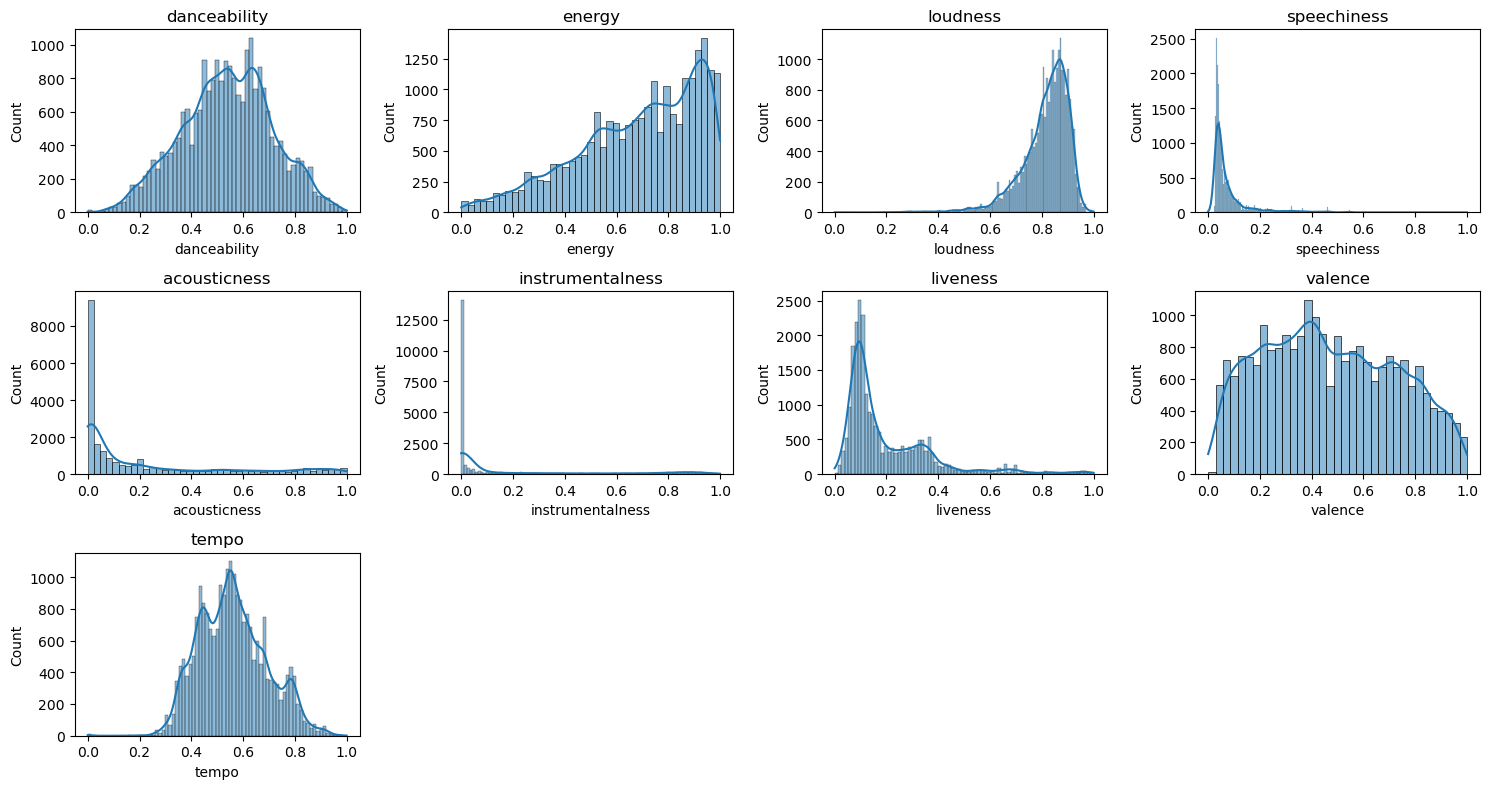

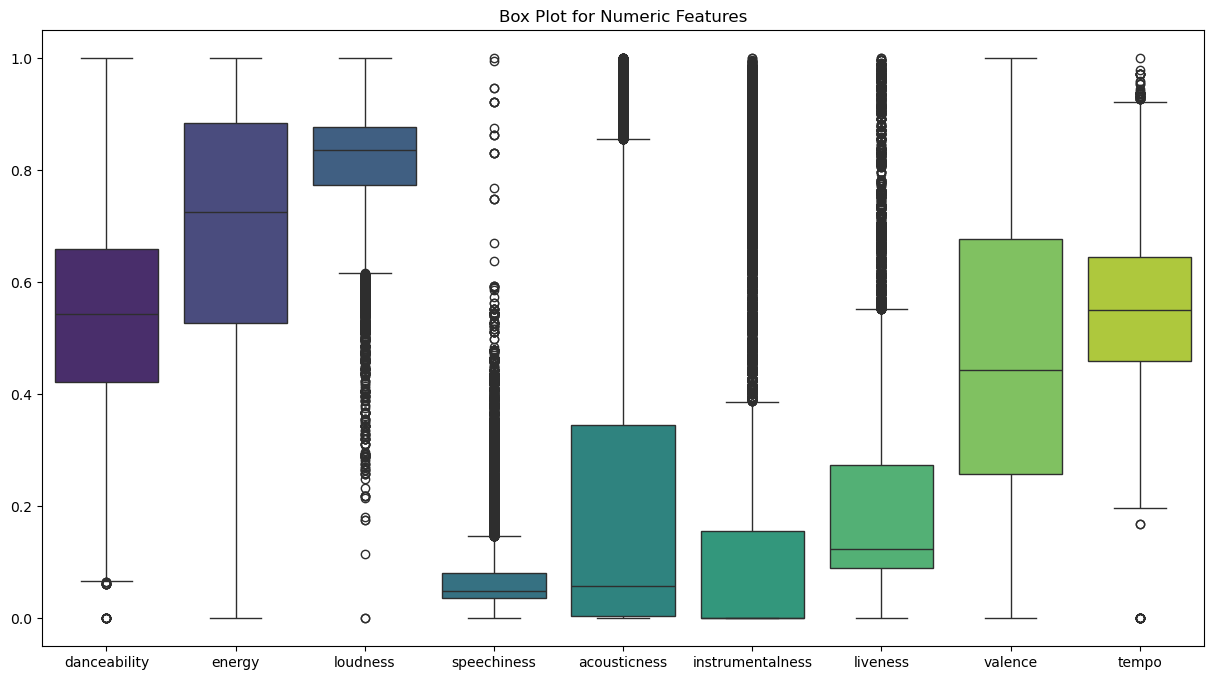

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# 선택한 숫자형 특성
numeric_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# 데이터 프레임에서 숫자형 특성만 선택
numeric_data = df_copy[numeric_features]

# 히스토그램과 박스 플롯 시각화
plt.figure(figsize=(15, 8))

# 히스토그램
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 4, i)
    sns.histplot(numeric_data[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

# 박스 플롯
plt.figure(figsize=(15, 8))
sns.boxplot(data=numeric_data, palette='viridis')
plt.title('Box Plot for Numeric Features')
plt.show()

In [48]:
print(df_copy.columns)

Index(['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       ...
       'genre_Latin', 'genre_Metal', 'genre_New Age', 'genre_Pop',
       'genre_Punk', 'genre_Rap', 'genre_Reggae', 'genre_RnB', 'genre_Rock',
       'genre_World'],
      dtype='object', length=8347)


In [49]:
"""# Data Preprocessing (deleting 'spotify_preview_url', 'year', 'duration_ms', 'mode', 'time_signature' and keeping only unique track_id)
columns_to_remove = ['spotify_preview_url', 'year', 'duration_ms', 'mode', 'time_signature','tags','spotify_id','track_id']

track_id             object
name                 object
artist               object
spotify_id           object
tags                 object
genre                object
danceability        float64
energy              float64
key                 float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
user_id              object
playcount           float64
dtype: object

df_copy.drop(columns=columns_to_remove, inplace=True)"""

"# Data Preprocessing (deleting 'spotify_preview_url', 'year', 'duration_ms', 'mode', 'time_signature' and keeping only unique track_id)\ncolumns_to_remove = ['spotify_preview_url', 'year', 'duration_ms', 'mode', 'time_signature','tags','spotify_id','track_id']\n\ntrack_id             object\nname                 object\nartist               object\nspotify_id           object\ntags                 object\ngenre                object\ndanceability        float64\nenergy              float64\nkey                 float64\nloudness            float64\nspeechiness         float64\nacousticness        float64\ninstrumentalness    float64\nliveness            float64\nvalence             float64\ntempo               float64\nuser_id              object\nplaycount           float64\ndtype: object\n\ndf_copy.drop(columns=columns_to_remove, inplace=True)"

In [50]:
"""df_copy = df_copy[~df_copy.index.duplicated(keep='first')]

# Filling NaN values with 0
df_copy.fillna(0, inplace=True)

df_copy.head(5)"""

"df_copy = df_copy[~df_copy.index.duplicated(keep='first')]\n\n# Filling NaN values with 0\ndf_copy.fillna(0, inplace=True)\n\ndf_copy.head(5)"

In [51]:
# 데이터프레임에서 지정된 컬럼을 드롭합니다.
processed_data = df_copy.drop(columns=['danceability'])

# 전처리된 데이터를 확인합니다.
processed_data.head()

,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playcount,...,genre_Latin,genre_Metal,genre_New Age,genre_Pop,genre_Punk,genre_Rap,genre_Reggae,genre_RnB,genre_Rock,genre_World
0,0.490480,0.363636,0.806714,0.049140,0.016884,0.000539,0.128482,0.519231,0.382997,0.0,...,0,0,0,1,0,0,0,0,0,0
1,0.490480,0.363636,0.806714,0.049140,0.016884,0.000539,0.128482,0.519231,0.382997,0.0,...,0,0,0,1,0,0,0,0,0,0
2,0.490480,0.363636,0.806714,0.049140,0.016884,0.000539,0.128482,0.519231,0.382997,0.0,...,0,0,0,1,0,0,0,0,0,0
3,0.490480,0.363636,0.806714,0.049140,0.016884,0.000539,0.128482,0.519231,0.382997,0.0,...,0,0,0,1,0,0,0,0,0,0
4,0.405393,0.000000,0.777711,0.054839,0.133668,0.000002,0.254006,0.230769,0.641576,0.0,...,0,0,0,0,0,0,0,0,0,0


# aws k means 이용하기 

In [6]:
from sagemaker import get_execution_role
from sagemaker.session import Session
role = get_execution_role()

# SageMaker Session 생성
sagemaker_session = Session()

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sagemaker.session import Session

# SageMaker Session 생성
sagemaker_session = Session()

# S3 버킷 및 접두사 정의
bucket = 'gcimlteam11'
prefix = 'k-means'

# music_listening_info 데이터프레임을 train 및 test로 나누기
train_data, test_data = train_test_split(new_data, test_size=0.2, random_state=42)

# 데이터를 CSV 파일로 저장 (이 부분을 실제로 사용하는 데이터프레임으로 변경해야 합니다.)
# 여기서는 처음 5000개의 행만 사용합니다.
train_data_subset = train_data.head(5000)
test_data_subset = test_data.head(5000)

train_data_subset.to_csv('train_k-means_data_new.csv', index=False)
test_data_subset.to_csv('test_k-means_data_new.csv', index=False)

# 데이터를 S3에 업로드
train_data_location = sagemaker_session.upload_data('train_k-means_data_new.csv', bucket=bucket, key_prefix=f'{prefix}/train')
test_data_location = sagemaker_session.upload_data('test_k-means_data_new.csv', bucket=bucket, key_prefix=f'{prefix}/test')

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [4]:
# 업로드된 S3 경로 확인
print(f'Train Data S3 Location: {train_data_location}')
print(f'Test Data S3 Location: {test_data_location}')

Train Data S3 Location: s3://gcimlteam11/k-means/train/train_k-means_data_new.csv
Test Data S3 Location: s3://gcimlteam11/k-means/test/test_k-means_data_new.csv


In [5]:
from sagemaker import get_execution_role

role = get_execution_role()

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
